In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a DataFrame
data = pd.read_csv("C:/Users/HP/Downloads/traces_data.csv",index_col=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_408\1263404901.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("C:/Users/HP/Downloads/traces_data.csv",index_col=False)


In [3]:
# remove special character 
data.columns = data.columns.str.replace(' ', '') 

In [4]:
# Display the first few rows of the DataFrame to understand its structure
data.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000


In [5]:
# Replace / from Name column 
data['Name'].replace('/', 'featureflagservice.repo.query:featureflags', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_408\2282853873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Name'].replace('/', 'featureflagservice.repo.query:featureflags', inplace=True)


In [6]:
# Check the data types and look for any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   traceID       183615 non-null  object
 2   spanID        183615 non-null  object
 3   parentSpanID  141834 non-null  object
 4   serviceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   durationNano  183615 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 9.8+ MB


In [7]:
#Count of null values 
data.isnull().sum()

Timestamp           0
traceID             0
spanID              0
parentSpanID    41781
serviceName         0
Name                0
durationNano        0
dtype: int64

In [8]:
# Fill null values by most frequent values for object datatype column
most_frequent_value = data['parentSpanID'].mode()[0]
data['parentSpanID'].fillna(most_frequent_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_408\463178190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['parentSpanID'].fillna(most_frequent_value, inplace=True)


In [9]:
#Check again Count of null values 
data.isnull().sum()

Timestamp       0
traceID         0
spanID          0
parentSpanID    0
serviceName     0
Name            0
durationNano    0
dtype: int64

In [10]:
# Summary statistics
data.describe()

,durationNano
count,1.836150e+05
mean,5.414918e+06
std,2.077879e+07
min,0.000000e+00
25%,3.357000e+05
50%,1.584906e+06
75%,6.832718e+06
max,4.999858e+09


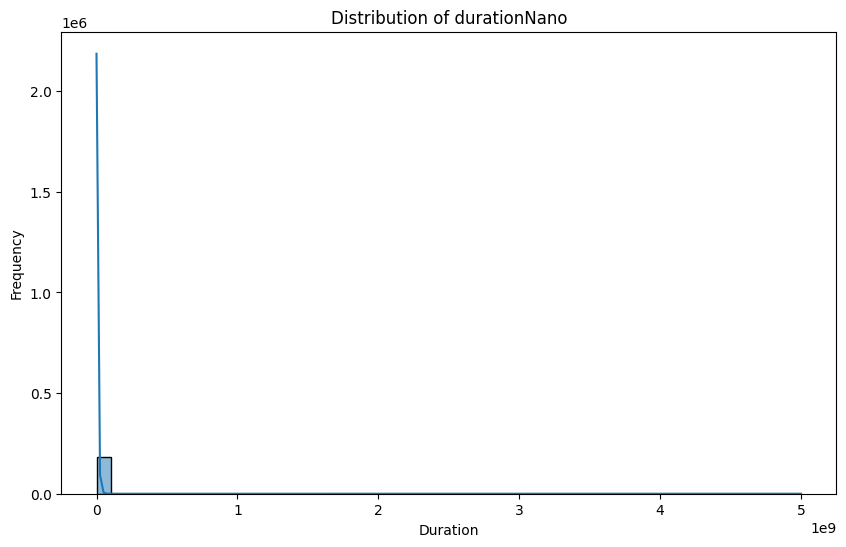

In [11]:
# Visualize the distribution of durationNano and nanosec automatic convert into second
plt.figure(figsize=(10, 6))
sns.histplot(data['durationNano'], bins=50, kde=True)
plt.title('Distribution of durationNano')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

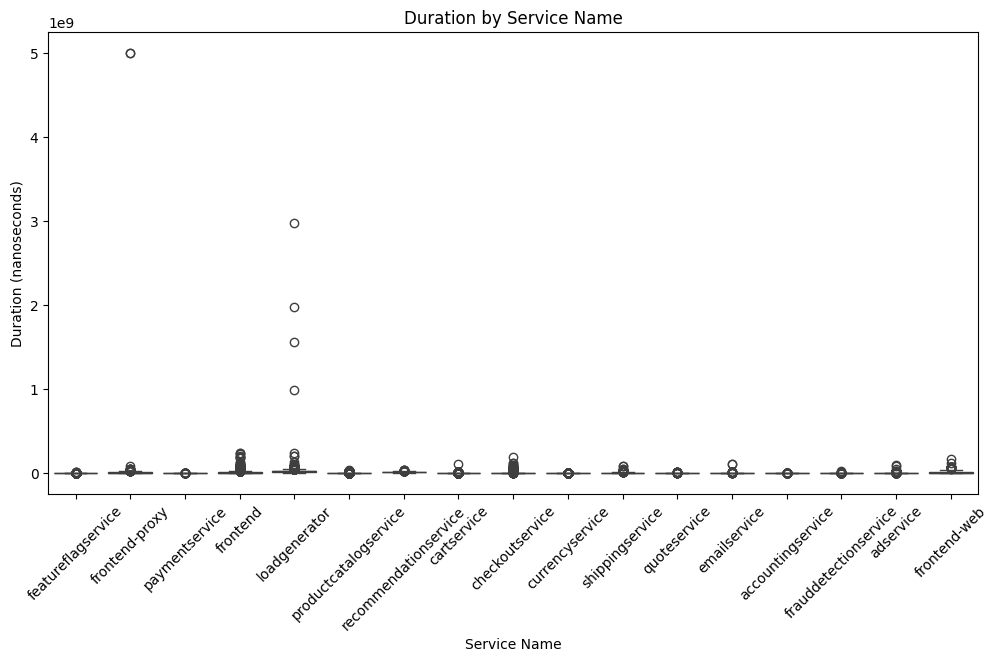

In [12]:
# Duration by Service Name
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='serviceName', y='durationNano')
plt.title('Duration by Service Name')
plt.xticks(rotation=45)
plt.xlabel('Service Name')
plt.ylabel('Duration (nanoseconds)')
plt.show()

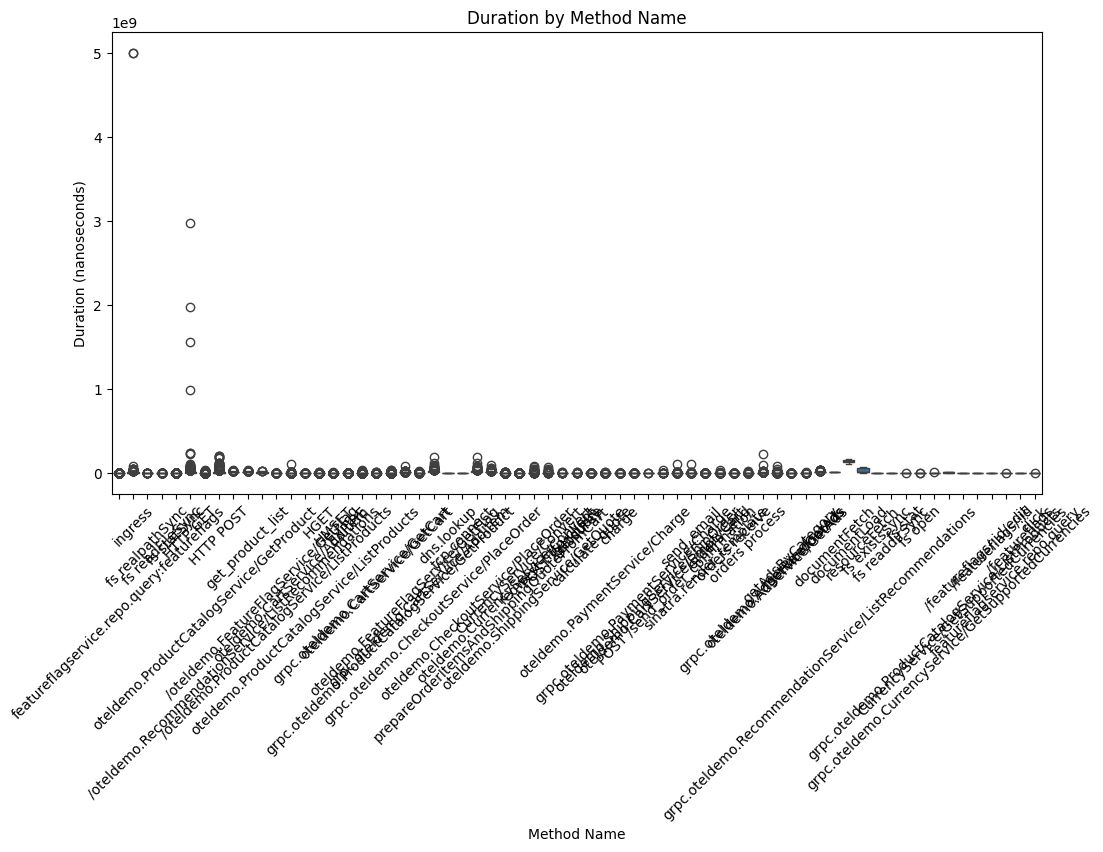

In [13]:
# Duration by Method Name
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Name', y='durationNano')
plt.title('Duration by Method Name')
plt.xticks(rotation=45)
plt.xlabel('Method Name')
plt.ylabel('Duration (nanoseconds)')
plt.show()


In [14]:
# Remove outliers from columns
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]
    print('Remove Outliers from Specific Column')

In [15]:
threshold_value = 0.9
removal_box_plot(data, 'durationNano', threshold_value)

Remove Outliers from Specific Column
